<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

🎉 Hey Asher — great start! Here is a detailed review:

**✅ Strengths**
    
- **Excellent structure**: Your project flows cleanly through data cleaning, EDA, visualization, and hypothesis testing — very easy to follow.
- **Thorough data preparation**: You correctly standardized columns, handled missing values thoughtfully (median/mode imputation), and documented each step clearly.
- **Great visualizations**: Clean and relevant plots (especially your heatmaps and stacked bar charts) made your findings easy to understand.
- **Strong hypothesis testing**: You correctly framed null and alternative hypotheses, selected the right test (Welch’s t-test), and interpreted results properly.
- **Deep regional/genre analysis**: You went beyond basics with normalized comparisons across timeframes and regions. Well done!

**🛠 Areas for Improvement**
    
- **Small critical error in median filling**:  
  In the following block:
  <code>
  df['user_score'].fillna(critic_median, inplace=True)
  </code>  
  You mistakenly filled missing `user_score` with `critic_median` instead of `user_median`. It should be:
  <code>
  df['user_score'].fillna(user_median, inplace=True)
  </code>
- **Dropping missing rows incorrectly**:  
  Example:
  <code>
  df['name'] = df['name'].dropna()
  </code>  
  This doesn't actually drop rows from the full dataset. Correct approach:
  <code>
  df = df.dropna(subset=['name'])
  </code>
- **Selection of relevant years**:  
  Choosing 2002–2004 to predict 2017 trends isn’t ideal. Normally, the most recent years (e.g., 2014–2016) are better predictors unless there's a very strong reason.
- **Missing final conclusion**:  
  Step 6 ("Write a general conclusion") is missing — important to properly close the project with a business-focused summary.

**🚀 Critical Changes Needed Before Approval**
    
- [ ] Fix the typo in filling missing values for `user_score` (use `user_median`).
- [ ] Correct the logic for dropping rows with missing critical values.
- [ ] Write a full, clear **general conclusion** summarizing platforms, genres, and regional insights.
- [ ] (Optional) Reconsider the selection of relevant years if possible.

---

🌟 Asher, your work shows fantastic effort and strong analytical skills! After fixing these small but important points, you’ll have an excellent and approvable project. Great job overall!

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Congrats on your approval, Asher! I wish you the best in the following projects ;)

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
from scipy import stats
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Check for duplicate entries
df.duplicated().sum()

0

### Key Questions to Answer:
- There are 16,715 entries in this dataset.
- Floats and objects are present in this dataset.
- Columns "User_Score" and "Rating" both possess the object datatype, but I think the float type woulbe be more useful in conducting mathematical and statistical analysis.
- Right away, there appear to be two blank entries in the "Name" column, while most other columns have no missing entries.  Only half of the games have a "Critic_Score" and/or "Rating" entry, with the "User_Score" column having few more.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
def lowercase_columns(df):
    df.columns = df.columns.str.lower()
    return df
df = lowercase_columns(df)

In [6]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [7]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = df['user_score'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


I changed the column user_score to float dtype to perform statistical analysis on this dataset.  Changing the type to numeric changed every occurence of 'tbd' to a missing value, and I will replace every missing value with the median score for that column.

In [9]:
# finding the count of missing values in critic_score, user_score, and rating
print(df['critic_score'].isna().sum(),
     df['user_score'].isna().sum(),
     df['rating'].isna().sum())

8578 9125 6766


The majority of entries in critic_score and user_score are missing values.  

In [10]:
# getting statistical values for critic_score and user_score
print(df['critic_score'].median())
print(df['user_score'].median())

71.0
7.5


Replacing the missing values with the median value will maintain the normal distribution of values for each column.

In [11]:
# replace every occurence 'tbd' with the median of the existing user scores
critic_median = df['critic_score'].median()
user_median = df['user_score'].median()

#fill missing values with median
df['critic_score'].fillna(critic_median, inplace=True)
df['user_score'].fillna(user_median, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


I replaced every missing value with the median value of the column in critic_score and user_score.

### 2.3 Handling Missing Values

In [12]:
# Examine missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [13]:
# Calculate percentage of missing values
total_rows = len(df)
mv_rows = df.isna().any(axis=1).gt(0).sum()
mv_row_count = mv_rows.sum()
percent_mv = (mv_row_count / total_rows) *100

print(f"NaN appear in {mv_rows} rows ({percent_mv:.2f}% of the dataset).")

NaN appear in 6947 rows (41.56% of the dataset).


For the rows with missing values in 'name', 'year_of_release', and 'genre', it makes sense to just remove them since they represent a statistically insignificant portion of the dataset.  Because the missing values in 'rating' represent a statistically significiant portion of the dataset, it would be helpful to replace the missing values with the mode value, since 'rating' is a categorical column.

In [14]:
# Handle missing values based on analysis
df= df.dropna(subset=['name', 'year_of_release', 'genre'])

mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)
print(mode_rating)
print(df['year_of_release'].head())


E
0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64


Given that most of the missing values were in the scores and rating columns, it's possible those games were not popular enough for critics or users to score them.  Additionally, it could be an artifact of games released before internet reviews were popular. 

I filled the missing values in critic_score and user_score with the the median score, and the missing values in rating with the mode.

### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['global_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year
game_year = df['year_of_release'].astype(int)

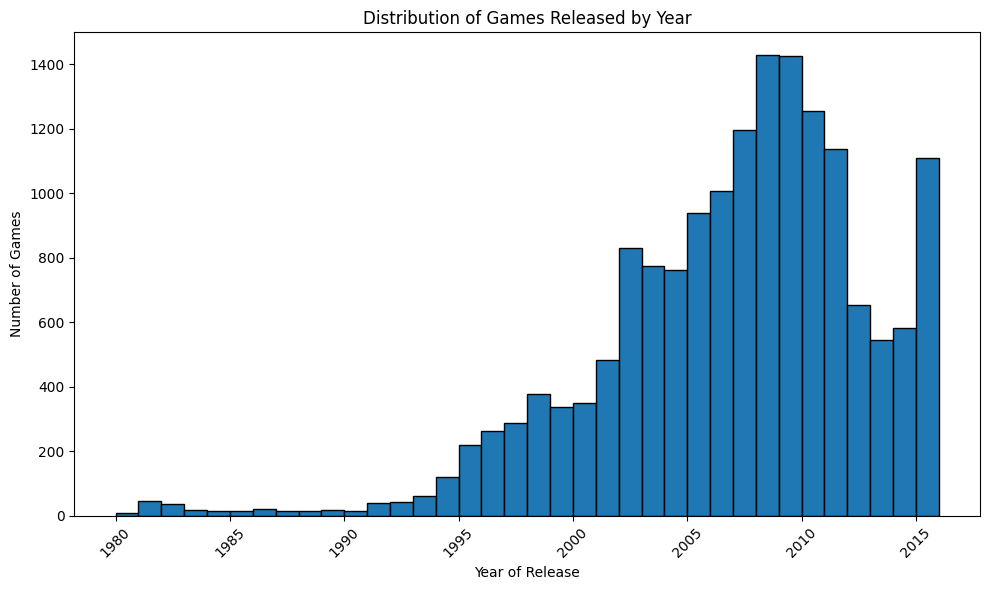

In [18]:
#bar plot for distribution of games across years
plt.figure(figsize=(10, 6))
plt.hist(game_year, bins=range(game_year.min(), game_year.max() + 1), edgecolor='black')
plt.title('Distribution of Games Released by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
year_counts = game_year.value_counts().sort_values(ascending=False)

# Get the top year
most_active_year = year_counts.idxmax()
most_games = year_counts.max()

print(f"The year with the most games released is {most_active_year}, with {most_games} games.")

The year with the most games released is 2008, with 1427 games.


In [ ]:
# Display summary statistics for each year
year_summary = df.groupby('year_of_release')['global_sales'].describe()
year_summary

- Years 2008 and 2009 saw the most games released.
- After 2011, the number of games released dropped significantly, reaching numbers seen around 2000. 
- Given that the trend after 2011 has been negative, we can assume that fewer games will be released in 2017 than 2016.  

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [ ]:
# Calculate total sales by platform and year
sales_platform_year = df.groupby(['platform', 'year_of_release'])['global_sales'].sum().reset_index()
sales_platform_year = sales_platform_year.sort_values(['platform', 'year_of_release'])
sales_platform_year

In [ ]:
# Create a heatmap of platform sales over time
pivot_sales = df.pivot_table(index='platform', columns='year_of_release', values='global_sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot_sales, cmap="YlGnBu", linewidths=0.5)
plt.title('Total Global Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [ ]:
# Identify platforms with declining sales
sales_platform_year['yearly_diff'] = sales_platform_year.groupby('platform')['global_sales'].diff()
def count_decline(group):
    group['decline'] = group['yearly_diff'] < 0
    group['decline_streak'] = group['decline'].rolling(window=3).sum()
    return group

platform_decline = sales_platform_year.groupby('platform').apply(count_decline)
declining_platforms = platform_decline[platform_decline['decline_streak'] >= 3]['platform'].unique()

print('Platforms with 3+ consecutive years of sales decline:')
print(declining_platforms)

- PC game sales have remained relatively stable from 1994 to 2016 while selling in lower numbers than the Playstion and XBox platforms.  Playstation and XBox platforms perform well across their respective generations.
- The 2600, several Nintendo platforms, as well as Playstation's PSP and PSV, along with vintage consoles like the SNES, N64, and GEN are all obsolete now.  Handheld systems seem to have disappeared, as well.  
- The typical lifecycle of a platform appears to be about 7 years.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [ ]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data
relevant_years = [2014, 2015, 2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]
print(df_relevant)

### Document Your Decision:
- What years did you select and why? The years 2014-16 represent the most recent data available.   
- How does this period reflect current market conditions?  Given the trend represented by these years, it is reasonable to assume the next year would follow that trend.
- What factors influenced your decision?  Current platforms are still relevant, so sales will not be split along existing platforms vs emerging platforms.  I know that technology has gotten more advanced as the years progress, and that games have become more complicated and more expensive to produce.  Given the sharp drop in games released in 2013, it is reasonable to assume that fewer games will be released in 2017 if the trend holds true.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [ ]:
# Analyze platform sales trends
#see next block

In [ ]:
# Sort platforms by total sales
filtered_df = df[df['year_of_release'].between(2014, 2016)]
sales_filtered = filtered_df.groupby('platform')['global_sales'].sum().reset_index()
sales_filtered = sales_filtered.sort_values(by='global_sales', ascending=False)
sales_filtered

In [ ]:
# Visualize top platforms
platforms = ['PS4', 'XOne', '3DS']
filtered_df = df[(df['year_of_release'].between(2014, 2016)) & (df['platform'].isin(platforms))]

sales_summary = (filtered_df.groupby('platform')['global_sales'].sum().reindex(platforms, fill_value=0).reset_index())

plt.figure(figsize=(8, 5))
plt.bar(sales_summary['platform'], sales_summary['global_sales'], edgecolor='black')
plt.title('Global Sales (2014-16) for PS4, Xbox One, 3DS')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

# Calculate year-over-year growth for each platform
sales_by_year = df.groupby(['platform', 'year_of_release'])['global_sales'].sum().reset_index()
sales_by_year = sales_by_year.sort_values(['platform', 'year_of_release'])
sales_by_year['yoy_growth'] = sales_by_year.groupby('platform')['global_sales'].pct_change()
sales_by_year['yoy_growth_pct'] = (sales_by_year['yoy_growth'] * 100).round(2)
sales_by_year['year_rank'] = sales_by_year.groupby('platform')['year_of_release'].rank(method='first')
filtered_growth = sales_by_year[sales_by_year['year_rank'] > 2]
sales_by_year = sales_by_year[sales_by_year['platform'].isin(['PS4', 'XOne', '3DS'])]
print(sales_by_year)

# Your code here to calculate and visualize platform growth rates
filtered_growth = filtered_growth[filtered_growth['platform'].isin(['PS4', 'XOne', '3DS'])]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_growth, x='year_of_release', y='yoy_growth_pct', hue='platform', marker='o')

plt.title('Year-over-Year Global Sales Growth (%) for PS4, Xbox One, 3DS (Excludes First Year)')
plt.xlabel('Year of Release')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

Platform sales in this time period show high initial positions with dramatic negative trend as the years progress.  Given that the life cycle of a platform is about 7 years from previous data, it appears that most consumers purchase a platform as soon as it is released, if not shortly after.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

In [ ]:
# Create box plot of sales by platform

plt.figure(figsize=(14,6))
sns.boxplot(data=sales_by_year, x='platform', y='global_sales')
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate detailed statistics for each platform

#stats for 3DS
threeds_stats = sales_by_year[sales_by_year['platform'] == '3DS']
print(threeds_stats.describe())

#stats for PS4
ps4_stats = sales_by_year[sales_by_year['platform'] == 'PS4']
print(ps4_stats.describe())

#stats for Xbox One
xone_stats = sales_by_year[sales_by_year['platform'] == 'XOne']
print(xone_stats.describe())

Across the total lifespan of these three platforms during 2014-16, Playstation 4 sold the most games, far outpacing both 3DS and Xbox One game sales.

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [ ]:
# Choose a popular platform based on your previous analysis
# chose PS2 as most popular based on total sales and games released
pop_platform = df[df['platform'] == 'PS4']
pop_platform.sample(10)

In [ ]:
# Create scatter plots for both critic and user scores
# used .copy() because I was getting warning "SettingWithCopyWarning"
pop_platform = df[df['platform'] == 'PS4'].copy()
pop_platform['user_score'] = pd.to_numeric(pop_platform['user_score'], errors='coerce')
pop_platform.loc[pop_platform['user_score'] > 10, 'user_score'] /= 10
plt.figure(figsize=(8,6))
plt.scatter(pop_platform['critic_score'], pop_platform['user_score'], alpha=0.7)
plt.title('Critic vs User Score for PS4 Games')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Most games scored between low 70s and low 90s, while few games scored higher than 90 and less than 70.

In [ ]:
# Critic Scores
plt.figure(figsize=(8, 6))
plt.scatter(pop_platform['year_of_release'], pop_platform['critic_score'], alpha=0.7)
plt.title('Critic Score over Time (PS4 Games)')
plt.xlabel('Year of Release')
plt.ylabel('Critic Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# User Scores
plt.figure(figsize=(8, 6))
plt.scatter(pop_platform['year_of_release'], pop_platform['user_score'], alpha=0.7)
plt.title('User Score over Time (PS4 Games)')
plt.xlabel('Year of Release')
plt.ylabel('User Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlations
score_data = pop_platform[['critic_score', 'user_score', 'year_of_release']]
score_correlation = score_data.corr(method='pearson')
print(score_correlation)

Critics scored games on a wider scale than users.  Users scored less games below the 6 mark than critics, while maintaining a similar scoring pattern across time.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [ ]:
# Find games released on multiple platforms
#searching years 2014-2016
def find_multi_platform_games(df):
    time_14_16 = df[df['year_of_release'].between(2014, 2016)]
    counts_14_16 = time_14_16.groupby('name')['platform'].nunique()
    multi_14_16 = time_14_16[time_14_16['name'].isin(counts_14_16[counts_14_16 > 1].index)]
    return multi_14_16

multi_14_16 = find_multi_platform_games(df)

print('Recent Period Games (2014-2016):')
print(multi_14_16[['name', 'platform', 'year_of_release']].sort_values('name'))

In [ ]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
#for years 2014-2016
sales_14_16 = (multi_14_16.groupby(['name', 'platform'])['global_sales'].sum().reset_index())
top_14_16_names = sales_14_16.groupby('name')['global_sales'].sum().nlargest(10).index # top 10 games
top_14_16 = sales_14_16[sales_14_16['name'].isin(top_14_16_names)]

#grouped bar chart for visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=top_14_16, x='name', y='global_sales', hue='platform')
plt.title('Sales Performance of Multi-Platform Games (2014–2016)')
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Game Name')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.show()

In the years 2014-2016, Playstation 4 dominated the market, followed distantly by Xbox One.  

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [ ]:
# Analyze genre performance
# Sort genres by total sales
genre_sales = (df.groupby('genre')['global_sales'].sum().sort_values(ascending=False).reset_index())
print(genre_sales)

In [ ]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='global_sales', palette='viridis')
plt.title('Total Global Sales by Genre (All Years)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#visualizing 2014-2016
late_genre = df[df['year_of_release'].between(2014, 2016)]
late_sales = late_genre.groupby('genre')['global_sales'].sum().reset_index()
late_sales['period'] = '2014–2016'

# barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=late_sales, x='genre', y='global_sales', hue='period')

plt.title('Genre Sales 2014–2016')
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Action, Shooter, Sports, and Role-Playing are the highest selling genres.  

In [ ]:
# Calculate market share for each genre
late = df[df['year_of_release'].between(2014, 2016)]
late_genre_sales = late.groupby('genre')['global_sales'].sum().reset_index()
total_late_sales = late_genre_sales['global_sales'].sum()

late_genre_sales['market_share'] = (late_genre_sales['global_sales'] / total_late_sales * 100).round(2)
late_genre_sales['period'] = '2014–2016'
print(late_genre_sales)

In [ ]:
#barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=late_genre_sales, x='genre', y='market_share', hue='period')

plt.title('Genre Market Share 2014–2016')
plt.ylabel('Market Share (%)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

As we can see, market share mirrors the previous sales graph.

### Key Questions for Genre Analysis:
- Action and Shooter games consistently performed well.
- All other gneres bseides Action, Shooter, Sports, and Role-Playing are significantly less popular.
- We can see that the genre spread is localized to 4 frontrunners, far out-pacing the rest of genres.  

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [ ]:
# Function to analyze platform performance by region
def platform_by_region(df, regions=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']):
    platform_region_sales = df.groupby('platform')[regions].sum()
    platform_region_sales = platform_region_sales.sort_values('global_sales', ascending=False)
    return platform_region_sales
platform_region_sales = platform_by_region(df)
print(platform_region_sales)

In [ ]:
# Analyze each region
def platform_sales_by_region(df, region='na_sales'):
    region_sales = df.groupby('platform')[region].sum().sort_values(ascending=False)
    return region_sales
na = platform_sales_by_region(df, 'na_sales')
eu = platform_sales_by_region(df, 'eu_sales')
jp = platform_sales_by_region(df, 'jp_sales')
other = platform_sales_by_region(df, 'other_sales')

#combine into one df
regional_breakdown = pd.DataFrame({'NA Sales': na, 'EU Sales': eu, 'JP Sales': jp, 'Other Sales': other}).fillna(0).astype(float).sort_values('NA Sales', ascending = False)
print(regional_breakdown)

In [ ]:
#stacked bar chart
regional_breakdown.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Platform Sales by Region')
plt.ylabel('Sales (Millions)')
plt.xlabel('Platform')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [ ]:
# Create a comparative platform analysis
def get_platform_region_sales(df):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    region_sales = df.groupby('platform')[region_cols].sum()
    return region_sales
platform_region_sales = get_platform_region_sales(df)
print(platform_region_sales)

def normalize_platforms(region_sales):
    return (region_sales.T / region_sales.sum(axis=1)).T.round(2)
platform_relative = normalize_platforms(platform_region_sales)
platform_relative = platform_relative.loc[platform_region_sales.sum(axis=1).sort_values(ascending=False).index]
print(platform_relative)

In [ ]:
# Visualize cross-regional comparison for top platforms
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(platform_relative, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Comparative Platform Performance Across Regions (Normalized by Platform)')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [ ]:
# Function to analyze genre performance by region
def genre_performance_by_region(df):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    genre_sales = df.groupby('genre')[region_cols].sum()
    return genre_sales

def normalize_genre_rows(genre_sales):
    return (genre_sales.T / genre_sales.sum(axis=1)).T.round(2)

genre_region_sales = genre_performance_by_region(df)
genre_relative = normalize_genre_rows(genre_region_sales)
genre_relative = genre_relative.loc[genre_region_sales.sum(axis=1).sort_values(ascending=False).index]

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(genre_relative, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Relative Genre Performance Across Regions (Normalized by Genre)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [ ]:
# Create a comparative genre analysis
#revisit late time period
late = df[df['year_of_release'].between(2014, 2016)]

def regional_genre_sales(data, label):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    grouped = data.groupby('genre')[region_cols].sum()
    grouped = (grouped.T / grouped.sum(axis=1)).T.round(2)  # Normalize by genre (row)
    grouped['period'] = label
    return grouped.reset_index()

late_genre = regional_genre_sales(late, '2014–2016')

#heatmap
heatmap_data = late_genre.set_index(['genre', 'period'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Genre Regional Sales Distribution: 2014–2016 (Normalized by Genre)')
plt.xlabel('Region')
plt.ylabel('Genre / Period')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [ ]:
# Function to analyze ESRB rating impact
region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
rating_sales = df.groupby('rating')[region_cols].sum().reset_index()

In [ ]:
# Analyze ESRB impact for each region
rating_share = rating_sales.set_index('rating')[region_cols]
rating_share_normalized = (rating_share / rating_share.sum()) * 100
rating_share_normalized = rating_share_normalized.round(2)

In [ ]:
# heatmap to visualize market share
plt.figure(figsize=(10, 6))
sns.heatmap(rating_share_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Rating Market Share by Region (%)')
plt.xlabel('Region')
plt.ylabel('ESRB Rating')
plt.tight_layout()
plt.show()

In [ ]:
# stacked bar chart for raw sales
rating_sales_plot = rating_sales.set_index('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
rating_sales_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Rating and Region (Millions)')
plt.ylabel('Sales')
plt.xlabel('Rating')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Games rated E sold the most copies by far across all regions, followed by T and M across all regions.  Ratings T and M sold in similar numbers across all regions with the EU an Other markets favoring games rated M.  The Japan market significantly favors games rated E.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [24]:
alpha = 0.05

# Ensure numeric conversion of user scores
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filter each platform and drop NaNs
xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Perform Welch’s t-test
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Output
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis – there IS a difference in user ratings.")
else:
    print("Fail to reject the null hypothesis – no significant difference in user ratings.")


T-statistic: -4.130, P-value: 0.0000
Reject the null hypothesis – there IS a difference in user ratings.


In [26]:
alpha = 0.05

action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()


t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject null hypothesis — user ratings differ between Action and Sports.")
else:
    print("Fail to reject null hypothesis — no significant difference in user ratings.")

T-statistic: 0.569, P-value: 0.5697
Fail to reject null hypothesis — no significant difference in user ratings.


I used and indepedent two-sample t-test to compare averages.  Null hypothesis assumes no change, and alternative hypothesis assumes change.  The samples are independent, user scores are continuous, 0.05 was chosen for alpha to control a Type 1 error (false positive).

In test 1, the P-value was less than the the alpha, which indicates there is significant difference in user ratings between Xbox One and PC platforms.
In test 2, the P-value was greater than the alpha which indicates user ratings do not differ between Action and Sports significantly.

# Step 6. Write a general conclusion
